<a href="https://colab.research.google.com/github/AlokDhanush/NASA_Kepler_Objects_Dataset/blob/main/NASA_Kepler_Objects_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Download the dataset using the link:** [NASA Kepler Objects Dataset](https://www.kaggle.com/datasets/arashnic/planets) and load the dataset into the session storage

###PREPROCESSING DATA

In [ ]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

In [ ]:
##Load the NASA_Kepler_Objects_Dataset

nasa_kod_data = pd.read_csv('/content/cumulative_2020.12.30_14.14.11.csv', skiprows=53)

nasa_kod_data.head()

,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,10811496,K00753.01,NaN,CANDIDATE,CANDIDATE,0.000,0,0,0,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [ ]:
##Optional: Check if there are any values that are 'CONFIRMED' in 'koi_disposition' column and 'FALSE POSITIVE' in 'koi_pdisposition'

nasa_kod_data[(nasa_kod_data['koi_disposition'] == "CONFIRMED") & (nasa_kod_data['koi_pdisposition'] == "FALSE POSITIVE")]

,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
274,11449844,K00125.01,Kepler-468 b,CONFIRMED,FALSE POSITIVE,0.920,0,1,0,0,...,-109.0,4.539,0.019,-0.110,0.879,0.118,-0.039,288.90222,49.370491,13.779
519,11974540,K00129.01,Kepler-470 b,CONFIRMED,FALSE POSITIVE,1.000,0,1,0,0,...,-712.0,2.936,0.180,-0.180,9.327,2.551,-3.826,297.00943,50.372318,13.224
778,7532973,K01450.01,Kepler-854 b,CONFIRMED,FALSE POSITIVE,0.041,0,1,0,0,...,-219.0,4.240,0.180,-0.180,1.305,0.396,-0.264,293.35129,43.134640,13.480
953,11517719,K01416.01,Kepler-840 b,CONFIRMED,FALSE POSITIVE,0.920,0,1,0,0,...,-181.0,4.426,0.087,-0.203,0.992,0.296,-0.127,296.50739,49.457291,14.152
2210,8478994,K00245.04,Kepler-37 e,CONFIRMED,FALSE POSITIVE,NaN,1,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,284.05954,44.518215,9.705
2767,10585738,K03032.01,Kepler-1415 b,CONFIRMED,FALSE POSITIVE,0.973,0,1,0,0,...,-186.0,4.538,0.027,-0.153,0.885,0.186,-0.062,285.15692,47.873329,15.744
3043,6444896,K03138.02,Kepler-1649 c,CONFIRMED,FALSE POSITIVE,0.374,1,0,0,0,...,0.0,5.274,0.000,0.000,0.118,0.000,0.000,292.50378,41.830421,17.131
3385,4742414,K00631.01,Kepler-628 b,CONFIRMED,FALSE POSITIVE,0.999,0,1,0,0,...,-117.0,4.169,0.176,-0.108,1.407,0.233,-0.284,290.44928,39.854801,13.398


In [ ]:
##Checking column 'koi_teq_err1' has all values as NaN

nasa_kod_data['koi_teq_err1'][:5]

,koi_teq_err1
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN


In [ ]:
##Get the information about each column in the dataset (Name, Non-Null Count, DataType)

nasa_kod_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 49 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   kepid              9564 non-null   int64  
 1   kepoi_name         9564 non-null   object 
 2   kepler_name        2360 non-null   object 
 3   koi_disposition    9564 non-null   object 
 4   koi_pdisposition   9564 non-null   object 
 5   koi_score          8054 non-null   float64
 6   koi_fpflag_nt      9564 non-null   int64  
 7   koi_fpflag_ss      9564 non-null   int64  
 8   koi_fpflag_co      9564 non-null   int64  
 9   koi_fpflag_ec      9564 non-null   int64  
 10  koi_period         9564 non-null   float64
 11  koi_period_err1    9110 non-null   float64
 12  koi_period_err2    9110 non-null   float64
 13  koi_time0bk        9564 non-null   float64
 14  koi_time0bk_err1   9110 non-null   float64
 15  koi_time0bk_err2   9110 non-null   float64
 16  koi_impact         9201 

In [ ]:
##Check the total number of rows in the dataset

len(nasa_kod_data)

9564

In [ ]:
##Replace all the NaN values in the column 'koi_score' with 0

nasa_kod_data.fillna({"koi_score": 0}, inplace=True)

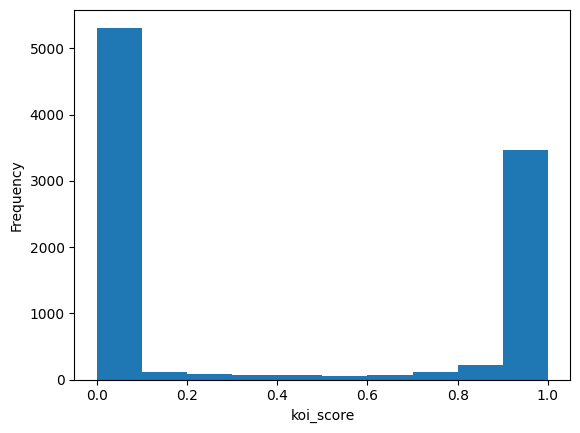

In [ ]:
##Plot the graph for visualization of column 'koi_score'

plt.hist(nasa_kod_data['koi_score'])
plt.xlabel('koi_score')
plt.ylabel('Frequency')
plt.show()

In [ ]:
##Remove 'columns = ['kepler_name', 'koi_teq_err1', 'koi_teq_err2', 'kepid', 'kepoi_name']', these columns do not help for model learning

nasa_kod_data = nasa_kod_data.drop(columns=['kepler_name', 'koi_teq_err1', 'koi_teq_err2', 'kepid', 'kepoi_name'])

nasa_kod_data.head()

,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,CANDIDATE,1.000,0,0,0,0,9.488036,2.775000e-05,-2.775000e-05,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,CONFIRMED,CANDIDATE,0.969,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,CANDIDATE,CANDIDATE,0.000,0,0,0,0,19.899140,1.494000e-05,-1.494000e-05,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,CONFIRMED,CANDIDATE,1.000,0,0,0,0,2.525592,3.761000e-06,-3.761000e-06,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [ ]:
##Again get the information about the dataset after the removal of those columns

nasa_kod_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 44 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   koi_disposition    9564 non-null   object 
 1   koi_pdisposition   9564 non-null   object 
 2   koi_score          9564 non-null   float64
 3   koi_fpflag_nt      9564 non-null   int64  
 4   koi_fpflag_ss      9564 non-null   int64  
 5   koi_fpflag_co      9564 non-null   int64  
 6   koi_fpflag_ec      9564 non-null   int64  
 7   koi_period         9564 non-null   float64
 8   koi_period_err1    9110 non-null   float64
 9   koi_period_err2    9110 non-null   float64
 10  koi_time0bk        9564 non-null   float64
 11  koi_time0bk_err1   9110 non-null   float64
 12  koi_time0bk_err2   9110 non-null   float64
 13  koi_impact         9201 non-null   float64
 14  koi_impact_err1    9110 non-null   float64
 15  koi_impact_err2    9110 non-null   float64
 16  koi_duration       9564 

In [ ]:
##Check the NaN values in the cells of the 'koi_period_err1' column and display those rows

nan_koi_period_err1 = nasa_kod_data[nasa_kod_data['koi_period_err1'].isna()]

nan_koi_period_err1.head()

,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
327,CANDIDATE,CANDIDATE,1.0,0,0,0,0,0.533059,NaN,NaN,...,-326.0,3.559,0.639,-0.071,4.051,0.788,-2.363,286.01920,48.866741,7.748
330,FALSE POSITIVE,FALSE POSITIVE,0.0,0,0,0,0,0.734525,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,293.28799,41.560455,13.220
360,FALSE POSITIVE,FALSE POSITIVE,0.0,1,0,0,0,6.721078,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,291.60690,38.348061,14.792
374,FALSE POSITIVE,FALSE POSITIVE,0.0,0,1,1,1,1.592633,NaN,NaN,...,-135.0,4.626,0.042,-0.028,0.651,0.053,-0.053,291.76196,37.098640,15.470
479,CANDIDATE,CANDIDATE,0.0,0,0,0,0,1.008617,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,292.47971,38.514919,15.319


In [ ]:
##Check the NaN values in the cells of the 'koi_period_err2' column and display those rows

nan_koi_period_err2 = nasa_kod_data[nasa_kod_data['koi_period_err2'].isna()]

nan_koi_period_err2.head()

,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
327,CANDIDATE,CANDIDATE,1.0,0,0,0,0,0.533059,NaN,NaN,...,-326.0,3.559,0.639,-0.071,4.051,0.788,-2.363,286.01920,48.866741,7.748
330,FALSE POSITIVE,FALSE POSITIVE,0.0,0,0,0,0,0.734525,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,293.28799,41.560455,13.220
360,FALSE POSITIVE,FALSE POSITIVE,0.0,1,0,0,0,6.721078,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,291.60690,38.348061,14.792
374,FALSE POSITIVE,FALSE POSITIVE,0.0,0,1,1,1,1.592633,NaN,NaN,...,-135.0,4.626,0.042,-0.028,0.651,0.053,-0.053,291.76196,37.098640,15.470
479,CANDIDATE,CANDIDATE,0.0,0,0,0,0,1.008617,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,292.47971,38.514919,15.319


In [ ]:
##Check if NaN values in both 'koi_period_err1' and 'koi_period_err2' are equal.

len(nan_koi_period_err1) == len(nan_koi_period_err2)

True

In [ ]:
##Check if the cells of the same rows of 'koi_period_err1' and 'koi_period_err2' has NaN and compare. If it returns True then same rows of
##those two colums are values are NaN.

nan_koi_complete = nasa_kod_data[nasa_kod_data['koi_period_err2'].isna() & nasa_kod_data['koi_depth_err2'].isna()]

len(nan_koi_complete) == len(nan_koi_period_err1) == len(nan_koi_period_err2)

True

In [ ]:
##Replace all the NaN values in the columns 'koi_period_err1' and 'koi_period_err2' with 0's.

nasa_kod_data['koi_period_err1'].fillna(0, inplace=True)
nasa_kod_data['koi_period_err2'].fillna(0, inplace=True)

<ipython-input-146-61b0de32c3d7>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  nasa_kod_data['koi_period_err1'].fillna(0, inplace=True)
<ipython-input-146-61b0de32c3d7>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

In [ ]:
nan_time = nasa_kod_data[nasa_kod_data['koi_time0bk'].isna()]

nan_time.head()

,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag


In [ ]:
nasa_kod_data['koi_time0bk'].head()

,koi_time0bk
0,170.538750
1,162.513840
2,175.850252
3,170.307565
4,171.595550


In [ ]:
nasa_kod_data['koi_time0bk_err1'].head(), nasa_kod_data['koi_time0bk_err2'].head()

(0    0.002160
 1    0.003520
 2    0.000581
 3    0.000115
 4    0.001130
 Name: koi_time0bk_err1, dtype: float64,
 0   -0.002160
 1   -0.003520
 2   -0.000581
 3   -0.000115
 4   -0.001130
 Name: koi_time0bk_err2, dtype: float64)

In [ ]:
nasa_kod_data['koi_time0bk_err1'].fillna(0, inplace=True)
nasa_kod_data['koi_time0bk_err2'].fillna(0, inplace=True)

<ipython-input-150-263c43e72119>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  nasa_kod_data['koi_time0bk_err1'].fillna(0, inplace=True)
<ipython-input-150-263c43e72119>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

In [ ]:
nasa_kod_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 44 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   koi_disposition    9564 non-null   object 
 1   koi_pdisposition   9564 non-null   object 
 2   koi_score          9564 non-null   float64
 3   koi_fpflag_nt      9564 non-null   int64  
 4   koi_fpflag_ss      9564 non-null   int64  
 5   koi_fpflag_co      9564 non-null   int64  
 6   koi_fpflag_ec      9564 non-null   int64  
 7   koi_period         9564 non-null   float64
 8   koi_period_err1    9564 non-null   float64
 9   koi_period_err2    9564 non-null   float64
 10  koi_time0bk        9564 non-null   float64
 11  koi_time0bk_err1   9564 non-null   float64
 12  koi_time0bk_err2   9564 non-null   float64
 13  koi_impact         9201 non-null   float64
 14  koi_impact_err1    9110 non-null   float64
 15  koi_impact_err2    9110 non-null   float64
 16  koi_duration       9564 

In [ ]:
nasa_kod_data['koi_impact'].head()

,koi_impact
0,0.146
1,0.586
2,0.969
3,1.276
4,0.701


In [ ]:
##Convert String values to integer or float values

position_mapping = {'CONFIRMED': 0, 'CANDIDATE': 1, 'FALSE POSITIVE': 2}

In [ ]:
##Map those mapped integer values to the original dataset

nasa_kod_data['koi_disposition'] = nasa_kod_data['koi_disposition'].map(position_mapping)

In [ ]:
nasa_kod_data['koi_pdisposition'] = nasa_kod_data['koi_pdisposition'].map(position_mapping)

In [ ]:
nasa_kod_data.head()

,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,0,1,1.000,0,0,0,0,9.488036,2.775000e-05,-2.775000e-05,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,0,1,0.969,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,1,1,0.000,0,0,0,0,19.899140,1.494000e-05,-1.494000e-05,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,2,2,0.000,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,0,1,1.000,0,0,0,0,2.525592,3.761000e-06,-3.761000e-06,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [ ]:
nasa_kod_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 44 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   koi_disposition    9564 non-null   int64  
 1   koi_pdisposition   9564 non-null   int64  
 2   koi_score          9564 non-null   float64
 3   koi_fpflag_nt      9564 non-null   int64  
 4   koi_fpflag_ss      9564 non-null   int64  
 5   koi_fpflag_co      9564 non-null   int64  
 6   koi_fpflag_ec      9564 non-null   int64  
 7   koi_period         9564 non-null   float64
 8   koi_period_err1    9564 non-null   float64
 9   koi_period_err2    9564 non-null   float64
 10  koi_time0bk        9564 non-null   float64
 11  koi_time0bk_err1   9564 non-null   float64
 12  koi_time0bk_err2   9564 non-null   float64
 13  koi_impact         9201 non-null   float64
 14  koi_impact_err1    9110 non-null   float64
 15  koi_impact_err2    9110 non-null   float64
 16  koi_duration       9564 

In [ ]:
nasa_kod_data['koi_tce_delivname'].head()

,koi_tce_delivname
0,q1_q17_dr25_tce
1,q1_q17_dr25_tce
2,q1_q17_dr25_tce
3,q1_q17_dr25_tce
4,q1_q17_dr25_tce


In [ ]:
##Check unique values in the 'koi_tce_delivname' column which is later used for mapping

nasa_kod_data['koi_tce_delivname'].unique()

array(['q1_q17_dr25_tce', 'q1_q16_tce', nan, 'q1_q17_dr24_tce'],
      dtype=object)

In [ ]:
tce_delivname_mapping = {'q1_q17_dr25_tce': 0, 'q1_q16_tce': 1, 'q1_q17_dr24_tce': 2}

In [ ]:
nasa_kod_data['koi_tce_delivname'] = nasa_kod_data['koi_tce_delivname'].map(tce_delivname_mapping)

nasa_kod_data.head()

,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,0,1,1.000,0,0,0,0,9.488036,2.775000e-05,-2.775000e-05,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,0,1,0.969,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,1,1,0.000,0,0,0,0,19.899140,1.494000e-05,-1.494000e-05,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,2,2,0.000,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,0,1,1.000,0,0,0,0,2.525592,3.761000e-06,-3.761000e-06,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [ ]:
##Import KNNImputer which replaces NaN values with most similar other rows in the dataset

from sklearn.impute import KNNImputer

In [ ]:
imputer = KNNImputer(n_neighbors=2)

nasa_kod_nan_filled = pd.DataFrame(imputer.fit_transform(nasa_kod_data), columns=nasa_kod_data.columns)

In [ ]:
nasa_kod_nan_filled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 44 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   koi_disposition    9564 non-null   float64
 1   koi_pdisposition   9564 non-null   float64
 2   koi_score          9564 non-null   float64
 3   koi_fpflag_nt      9564 non-null   float64
 4   koi_fpflag_ss      9564 non-null   float64
 5   koi_fpflag_co      9564 non-null   float64
 6   koi_fpflag_ec      9564 non-null   float64
 7   koi_period         9564 non-null   float64
 8   koi_period_err1    9564 non-null   float64
 9   koi_period_err2    9564 non-null   float64
 10  koi_time0bk        9564 non-null   float64
 11  koi_time0bk_err1   9564 non-null   float64
 12  koi_time0bk_err2   9564 non-null   float64
 13  koi_impact         9564 non-null   float64
 14  koi_impact_err1    9564 non-null   float64
 15  koi_impact_err2    9564 non-null   float64
 16  koi_duration       9564 

###DIFFERENT MODEL BUILDING, TRAINING AND TESTING

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
##Separating target (y) and features (X)

X = nasa_kod_nan_filled.drop(columns = ["koi_disposition"])
y = nasa_kod_nan_filled['koi_disposition']

In [ ]:
X.head()

,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1.0,1.000,0.0,0.0,0.0,0.0,9.488036,2.775000e-05,-2.775000e-05,170.538750,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,1.0,0.969,0.0,0.0,0.0,0.0,54.418383,2.479000e-04,-2.479000e-04,162.513840,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,1.0,0.000,0.0,0.0,0.0,0.0,19.899140,1.494000e-05,-1.494000e-05,175.850252,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,2.0,0.000,0.0,1.0,0.0,0.0,1.736952,2.630000e-07,-2.630000e-07,170.307565,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,1.0,1.000,0.0,0.0,0.0,0.0,2.525592,3.761000e-06,-3.761000e-06,171.595550,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [ ]:
y.head()

,koi_disposition
0,0.0
1,0.0
2,1.0
3,2.0
4,0.0


In [ ]:
##Spliting training and testing data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
len(X_train), len(X_test), len(y_train), len(y_test)

(7651, 1913, 7651, 1913)

In [ ]:
##Making sure if no NaN values are present in all the columns

null_list = []
for col in X_train.columns:
  null_list.append(X_train[col].isna().sum())

print(null_list)

[np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0)]


In [ ]:
##Using Support Vector Classifier (SVC) for classification

from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

In [ ]:
svc_model.score(X_train, y_train)

0.5098679911122729

In [ ]:
##SVM model testing

svc_model.score(X_test, y_test)

0.490852064819655

In [ ]:
##Using RandomForestClassifier model for classification

from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
##Random Forest Classifier model: testing accuracy for both training and testing set

rf_model.score(X_train, y_train), rf_model.score(X_test, y_test)

(1.0, 0.9137480397281756)

In [ ]:
import tensorflow as tf

In [ ]:
##Small Neural Network model with three hidden layers and 320 neurons (128+128+64).
##Activation function(AF)'leaky_relu' to make the model non-linear to learn complex patterns. (There are other AF such as 'tanh', 'relu', etc).
##Use 3 output neurons. 3 nuerons because there are total of 3 classes to classify {'CONFIRMED': 0, 'CANDIDATE': 1, 'FALSE POSITIVE': 2}.
##Softmax: Used for multi-class classification output layers, producing a probability distribution over the possible classes.

nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='leaky_relu'),
    tf.keras.layers.Dense(128, activation='leaky_relu'),
    tf.keras.layers.Dense(64, activation='leaky_relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

##Compile the model
nn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
##Train the model

nn_model.fit(X_train, y_train, epochs=20, validation_split=0.2)

Epoch 1/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6396 - loss: 2.2395 - val_accuracy: 0.5278 - val_loss: 7.0116
Epoch 2/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6110 - loss: 5.4257 - val_accuracy: 0.6545 - val_loss: 4.8879
Epoch 3/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6365 - loss: 2.2052 - val_accuracy: 0.6604 - val_loss: 1.8994
Epoch 4/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6461 - loss: 1.2295 - val_accuracy: 0.5278 - val_loss: 4.4385
Epoch 5/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6216 - loss: 2.6868 - val_accuracy: 0.6499 - val_loss: 2.6971
Epoch 6/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6354 - loss: 3.6891 - val_accuracy: 0.5735 - val_loss: 12.0289
Epoch 7/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5928 - loss: 8.4492 - val_accuracy: 0.5885 - val_loss: 54.5458
Epoch 8/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5819 - loss: 35.2557 - val_accuracy:

In [ ]:
##Testing Nueral Network model on NASA Kepler Objects Dataset

nn_model.evaluate(X_test, y_test)

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6373 - loss: 12.3245


[8.230679512023926, 0.6330370903015137]

###SAVING DIFFERENT MODELS IN THEIR RESPECTIVE FORMATS

In [ ]:
##Using save() method saves the nueral network model in '.h5' format in the given path

nn_model.save('nasa_kepler_objects_nn_model.h5')

In [ ]:
## To save sklearn models, use joblib library or pickle library to save the model
import joblib

joblib.dump(rf_model, 'nasa_kepler_objects_rf_model.pkl')

['nasa_kepler_objects_rf_model.pkl']

In [ ]:
joblib.dump(svc_model, 'nasa_kepler_objects_svc_model.pkl')

['nasa_kepler_objects_svc_model.pkl']